In [1]:
import qiime2
from qiime2.plugins import (feature_table, metadata, demux, quality_filter,
                           deblur,alignment,phylogeny,diversity,emperor,
                            taxa,composition,feature_classifier,dada2)
from qiime2 import Artifact

In [5]:
#create folder and get data
#!mkdir fecal_microb
!wget -O 'fecal_microb/sample_metadata.tsv' 'https://data.qiime2.org/2018.11/tutorials/fmt/sample_metadata.tsv'
!wget -O 'fecal_microb/fmt-tutorial-demux-1.qza' 'https://data.qiime2.org/2018.11/tutorials/fmt/fmt-tutorial-demux-1-10p.qza'
!wget -O 'fecal_microb/fmt-tutorial-demux-2.qza' 'https://data.qiime2.org/2018.11/tutorials/fmt/fmt-tutorial-demux-2-10p.qza'

--2018-12-23 15:29:38--  https://data.qiime2.org/2018.11/tutorials/fmt/sample_metadata.tsv
Resolviendo data.qiime2.org... 104.27.170.158, 104.27.171.158, 2606:4700:30::681b:aa9e, ...
Conectando con data.qiime2.org[104.27.170.158]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 FOUND
Localización: https://docs.google.com/spreadsheets/d/1gDLqE7jFs2eoir0kcBq8o_4ZtnPJxUcE3BB8pr3DOzo/export?gid=0&format=tsv [siguiendo]
--2018-12-23 15:29:39--  https://docs.google.com/spreadsheets/d/1gDLqE7jFs2eoir0kcBq8o_4ZtnPJxUcE3BB8pr3DOzo/export?gid=0&format=tsv
Resolviendo docs.google.com... 64.233.190.139, 64.233.190.101, 64.233.190.138, ...
Conectando con docs.google.com[64.233.190.139]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/tab-separated-values]
Grabando a: “fecal_microb/sample_metadata.tsv”

fecal_microb/sample     [ <=>                ]  15,65K  --.-KB/s    en 0,05s   

2018-12-23 15:29:39 (299 KB/s) - “fecal_micro

<visualization: Visualization uuid: fbce375b-6d4e-4900-a42a-ce791d3e1143>

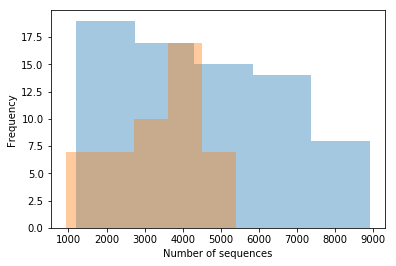

In [43]:
#load data and demultiplex
s_metadata = qiime2.Metadata.load('fecal_microb/sample_metadata.tsv')
dmx_seq1= Artifact.load('fecal_microb/fmt-tutorial-demux-1.qza')
dmx_seq2= Artifact.load('fecal_microb/fmt-tutorial-demux-2.qza')
dmx_sum1 = demux.visualizers.summarize(dmx_seq1)
dmx_sum2 = demux.visualizers.summarize(dmx_seq2)
dmx_sum1.visualization

In [42]:
dmx_sum2.visualization

<visualization: Visualization uuid: 9989c69a-f6d0-4bb2-93a8-698851618ddc>

In [3]:
#denoise with dada2, n_threads=0 uses all the available threads to filter
dada2_seq1 = dada2.methods.denoise_single(dmx_seq1,trim_left=13,trunc_len=150,
                                         n_threads=0)

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada_single.R /tmp/qiime2-archive-hhexeeax/5db90b62-c6e4-4c09-8c79-c0cdfbe2cea0/data /tmp/tmp716rjnlz/output.tsv.biom /tmp/tmp716rjnlz/track.tsv /tmp/tmp716rjnlz 150 13 2.0 2 Inf consensus 1.0 0 1000000 NULL 16



In [4]:
dada2_seq2 = dada2.methods.denoise_single(dmx_seq2,trim_left=13,trunc_len=150,
                                         n_threads=0)

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada_single.R /tmp/qiime2-archive-aknkia2x/5f459ea8-c6a8-438e-b42f-35e4f86166d7/data /tmp/tmp0blqu1ox/output.tsv.biom /tmp/tmp0blqu1ox/track.tsv /tmp/tmp0blqu1ox 150 13 2.0 2 Inf consensus 1.0 0 1000000 NULL 16



In [5]:
dada2_1 = metadata.visualizers.tabulate(
                dada2_seq1.denoising_stats.view(qiime2.Metadata))
dada2_2 = metadata.visualizers.tabulate(
                dada2_seq2.denoising_stats.view(qiime2.Metadata))
dada2_1.visualization

<visualization: Visualization uuid: 32d73ff2-a2dd-4914-a315-57d33c5a49e3>

In [36]:
dada2_2.visualization

<visualization: Visualization uuid: 68c50120-3f0a-4fda-bfcd-ed5d1d96e0c3>

In [30]:
# merge denoised data
merged_table = feature_table.methods.merge([dada2_seq1.table,dada2_seq2.table])
merged_seq = feature_table.methods.merge_seqs(
                [dada2_seq1.representative_sequences,
                 dada2_seq2.representative_sequences])

In [34]:
merged_sum = feature_table.visualizers.summarize(merged_table.merged_table,
                                                sample_metadata=s_metadata)

In [41]:
%matplotlib inline
merged_sum.visualization

<visualization: Visualization uuid: 1e677cc9-0137-4a17-ac85-60a704e1f85a>

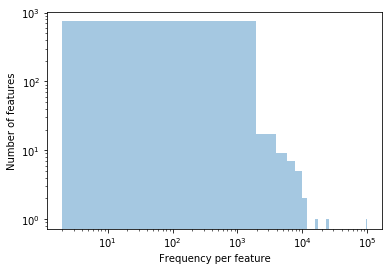

In [44]:
merged_seq = feature_table.visualizers.summarize(,
                                                sample_metadata=s_metadata)